## Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,ElasticNet
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import  RFE
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
X_top = pd.read_csv('../datasets/X_top.csv',index_col='Id') 
y = pd.read_csv('../datasets/y.csv',index_col='Id') 


In [3]:
y= y["SalePrice"]

In [4]:
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top,y,test_size = 0.2, random_state=42)

In [5]:
ss = StandardScaler()
ss.fit(X_top_train)

X_top_train_ss = ss.transform(X_top_train)
X_top_test_ss = ss.transform(X_top_test)

## Production Model: ElasticNet Model

In [6]:
# Instantiate pipeline object.
pipe_e = Pipeline([('ss', StandardScaler()), ('enet', ElasticNet())])



In [7]:
# Define dictionary of hyperparameters.

pipe_e_params = {'ss__with_mean': [True, False], 
                'ss__with_std': [True, False],
                'enet__alpha': np.arange(0.01, 1.0, 0.05),
                'enet__l1_ratio': np.linspace(0.01, 1.0, 25),
                 'enet__normalize': [True, False],
                }



In [8]:
# Instantiate our GridSearchCV object.

gs_e = GridSearchCV(pipe_e, pipe_e_params, cv = 10, verbose=1)

In [9]:
gs_e.fit(X_top_train_ss, y_top_train);

Fitting 10 folds for each of 4000 candidates, totalling 40000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40000 out of 40000 | elapsed:  5.1min finished


In [10]:
gs_e.score(X_top_train_ss, y_top_train)

0.8910928842580639

In [11]:
gs_e.score(X_top_test_ss, y_top_test)

0.8866403045116943

In [12]:
print('RMSE:', np.sqrt(mean_squared_error(y_top_test, gs_e.predict(X_top_test_ss))))

RMSE: 26003.64347264249


## Insights

In [13]:
columns = X_top.columns
coefficients =pd.DataFrame(gs_e.best_estimator_.named_steps['enet'].coef_.T, 
                     index = columns, 
                     columns=['coef'])

In [14]:
coefficient = coefficients.sort_values('coef', ascending=False)['coef']

In [15]:
coefficient

Gr Liv Area             21712.657658
Overall Qual            15946.737051
BsmtFin SF 1             9062.532169
Exter Qual               8868.978494
Neighborhood_NridgHt     7418.445717
Lot Area                 6536.193869
Neighborhood_StoneBr     6225.014730
Bsmt Exposure            5245.717490
Year Built_2008          5190.177499
Total Bsmt SF            4679.866181
Garage Area              4398.921820
Roof Style_Hip           4310.919595
1st Flr SF               4185.808470
Heating QC               3375.485593
Mas Vnr Area             3370.892779
Neighborhood_NoRidge     3302.290377
Bsmt Qual                2927.021463
MS SubClass_SC60         2851.336624
Wood Deck SF             1576.053884
Open Porch SF            1506.772859
Roof Style_Gable         1030.811307
Lot Shape                -176.810181
MS Zoning_RM            -1376.784687
house age               -1422.432896
reno newness            -3846.382467
Name: coef, dtype: float64

In [16]:
labels = coefficient.sort_values(ascending=False).index

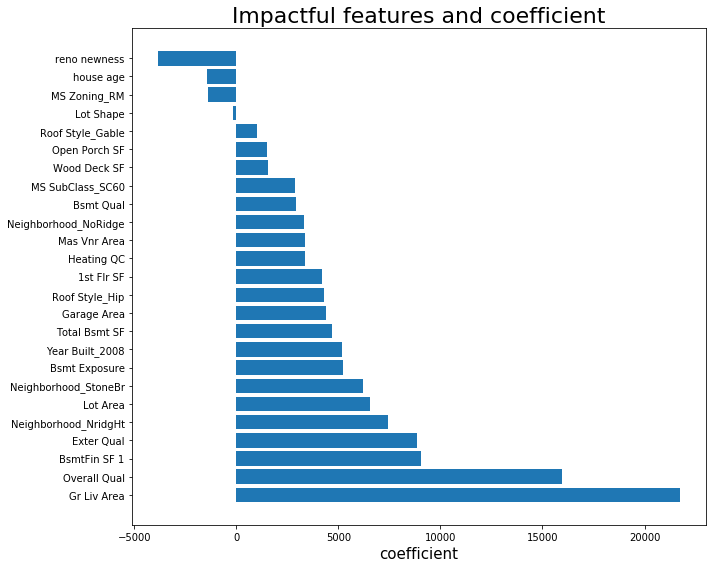

In [17]:
plt.figure(figsize=(10,8))
plt.barh(labels, coefficient.sort_values(ascending=False) )
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('coefficient', fontsize=15)
plt.title('Impactful features and coefficient', fontsize=22)
plt.tight_layout()



In [19]:
plt.savefig("../image/coefficient.png")

<Figure size 432x288 with 0 Axes>

## Conclusion:

From the graph above, there are many size related features such as the ground living area, total basement area etc, that have a large positive impact on sale price, with ground living area having the highest impact of 1 unit of increase of more than $20,000. This could mean that space is a premium.

Intuitively overall quality of the house has the second largest positive impact on sale price.

The newer neighborhoods such as Stone Brook identified during EDA have a positive impact on sale price.

The newer the house and renovations the higher the impact on sale price

Having good quality exterior features such as Masonry veneer have a positive impact on sale price

Living in a medium density residential area has a negative impact on sale price, most likely more people would live in an area where houses are cheap

Only area related features do not have a significant impact on price

Having a a good quality fireplace has a significant postive impact on sale price, this could be due to Ames, Iowa, having average annual temperatures of 10 degrees Celsius.

Having a basement also has a significant postive impact on sale price which is also related to the size of the house

Houses built in 2008 have a positive impact on sale price, this could be due to housing prices reaching their peak prior to the financial crisis. Analysis during the EDA has also shown that sale prices after 2008 were lower.


## Outside research

The high sale prices correlated with space is unusual as Ames Iowa has a small population of less than 100 000. However, it could be due to Ames being a university town, the university is Iowa State University. Research has shown that houses near universities will have higher prices as the staff, faculty members and students all want to stay near the university. This is likely the case with Ames as Google Maps indicates that Northridge Heights and Stone Brook , the top 2 nieghborhoods impacting sale price are only 4 mins drive to the university. Furthermore, the university is the largest employer in Ames.

In addition, investors would also buy property near the university to rent out to people wanting to stay near the university.

Although size related features seem to have a large positive impact on sale price, data on residential distance from the university is needed to determine whether it has an impact or even a larger one than size features. The higher priced neighbourhoods near the university seem to support that hypothesis, however these areas are also relatively new which also has an impact on price and hence preventing a clear correlation and causation relationship.

The sale price also needs to be adjusted for inflation to gain a more accurate analysis.

The size of the house and the overall quality of the house would add the most value to a home
The age of the house and age of renovation hurt the value of a home the most
Homeowners can increase the value of their homes by renovating close to the selling date and ensure the quality of their roof and masonry is good and if size permits to include a wood deck or open porch. Having a good heating system would also help to increase the sale price.

The newer neighborhoods like Northridge Height, Stone Brook and Northridge have high coefficients.

The model will not generalize to other cities unless they are also located near universities, similar demographics and weather. I would need information about distance from facilities, weather and demographic information. In addition, the sale prices need to be adjusted for inflation.

Information of the local econonmy would help predict the sale price as an improving economy should increase demand. Data on the number of houses built would also determine whether limited housing supply would also predict sale price.


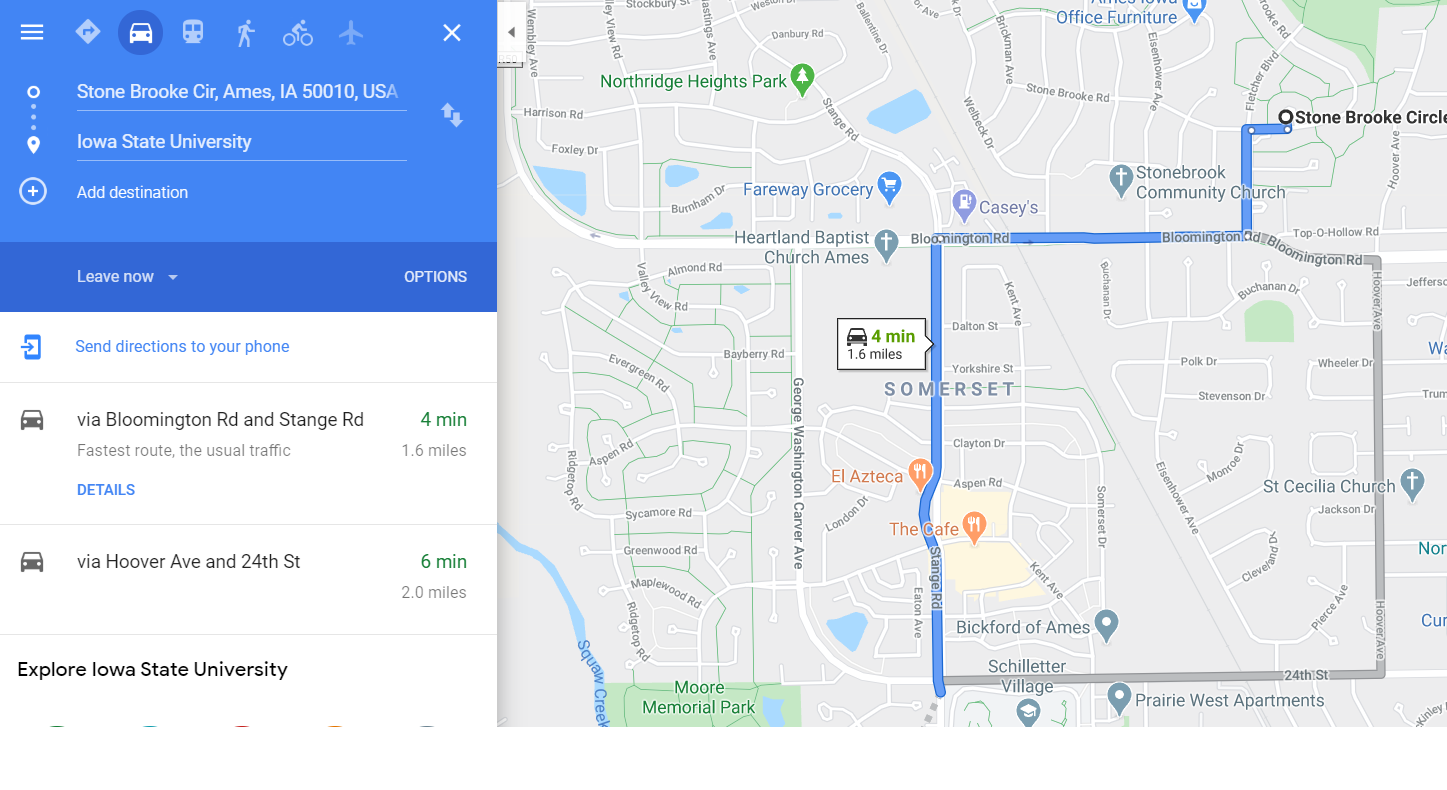

In [21]:
# 4 min drive from Stone Brook to Iowa State University
from IPython.display import Image
Image('../image/StoneB.png')


References: 

https://sites.duke.edu/urbaneconomics/?p=1102

https://www.weather.gov/images/dmx/Climate/Annual_AvgT.png

https://en.wikipedia.org/wiki/Ames,_Iowa

http://jse.amstat.org/v19n3/decock.pdf

https://www.census.gov/quickfacts/amescityiowa